In [21]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

# to build pipeline

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pickle , os


import seaborn as sns
import matplotlib.pylab as plt

# setting figure size
plt.figure(figsize=(20,12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [22]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\Delivery_data_proc.csv")
df = df.drop("Unnamed: 0", axis=1)

In [23]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3,No,Metropolitian,46,night,15,21,55,22,10
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1,No,Metropolitian,23,afternoon,10,14,55,15,5
2,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0,No,Metropolitian,20,morning,10,9,20,9,30
3,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1,No,Metropolitian,41,evening,15,19,50,20,5
4,29,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,Buffet,...,1,No,Metropolitian,20,evening,10,20,25,20,35


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          24728 non-null  int64  
 1   Delivery_person_Ratings      24728 non-null  float64
 2   Restaurant_latitude          24728 non-null  float64
 3   Restaurant_longitude         24728 non-null  float64
 4   Delivery_location_latitude   24728 non-null  float64
 5   Delivery_location_longitude  24728 non-null  float64
 6   Weather_conditions           24728 non-null  object 
 7   Road_traffic_density         24728 non-null  object 
 8   Vehicle_condition            24728 non-null  int64  
 9   Type_of_order                24728 non-null  object 
 10  Type_of_vehicle              24728 non-null  object 
 11  multiple_deliveries          24728 non-null  int64  
 12  Festival                     24728 non-null  object 
 13  City            

# split data with catagorical and numerical features

In [25]:

numerical_columns = df.select_dtypes(exclude = "object")
categorical_columns =  df.select_dtypes(include = "object")


cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]]
cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City',"Daytime"]]


In [26]:
numerical_columns.columns
# ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
#        'Restaurant_longitude', 'Delivery_location_latitude',
#        'Delivery_location_longitude', 'Vehicle_condition',
#        'multiple_deliveries', 'Time_taken (min)', 'Time_Difference_Minutes',
#        'Order_Hour', 'Order_Minute', 'Picked_Hour', 'Picked_Minute']

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Difference_Minutes',
       'Order_Hour', 'Order_Minute', 'Picked_Hour', 'Picked_Minute'],
      dtype='object')

In [27]:
# numerical_columns = numerical_columns.drop(columns=['Restaurant_latitude',
#        'Restaurant_longitude', 'Delivery_location_latitude',
#        'Delivery_location_longitude'], axis=1)

In [28]:
df.Daytime

0            night
1        afternoon
2          morning
3          evening
4          evening
           ...    
24723      evening
24724        night
24725      morning
24726    afternoon
24727      evening
Name: Daytime, Length: 24728, dtype: object

In [29]:
for i in categorical_columns:
    print(df[i].unique())

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
['Jam' 'High' 'Low' 'Medium']
['Snack' 'Meal' 'Buffet' 'Drinks']
['motorcycle' 'scooter' 'electric_scooter']
['No' 'Yes']
['Metropolitian' 'Urban' 'Semi-Urban']
['night' 'afternoon' 'morning' 'evening']


In [30]:
wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]

traffic_cat = ['Low','Medium','High','Jam']

festival_cat = ['No', 'Yes']

#-------------------------------------------------------------------------#

typeoforder = ['Snack' 'Meal' 'Buffet' 'Drinks']

typeofvehicle = ['motorcycle' 'scooter' 'electric_scooter']

city = ['Metropolitian' 'Urban' 'Semi-Urban']

day_time = ['night' 'afternoon' 'morning' 'evening']


In [31]:
# sns.pairplot(numerical_columns)

In [32]:
df =pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\raw\Delivery_data_WithDist.csv")

In [33]:
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute,onground_dist(KM)
0,0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,...,No,Metropolitian,46,night,15,21,55,22,10,12.7
1,1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,...,No,Metropolitian,23,afternoon,10,14,55,15,5,8.6
2,2,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,...,No,Metropolitian,20,morning,10,9,20,9,30,4.7
3,3,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,...,No,Metropolitian,41,evening,15,19,50,20,5,32.8
4,4,29,4.5,19.176269,72.836721,19.266269,72.926721,Sandstorms,Jam,2,...,No,Metropolitian,20,evening,10,20,25,20,35,21.6


In [34]:
df.columns

Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'Daytime', 'Time_Difference_Minutes',
       'Order_Hour', 'Order_Minute', 'Picked_Hour', 'Picked_Minute',
       'onground_dist(KM)'],
      dtype='object')

In [35]:
df = df.drop(labels=["Unnamed: 0",'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude','Order_Hour','Order_Minute','Picked_Hour','Picked_Minute'],axis=1)

In [36]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,onground_dist(KM)
0,36,4.2,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,night,15,12.7
1,21,4.7,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,afternoon,10,8.6
2,34,4.3,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,morning,10,4.7
3,24,4.7,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,evening,15,32.8
4,29,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1,No,Metropolitian,20,evening,10,21.6


In [37]:
df.to_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\Processed_Delivery_data_WithDist.csv")

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_29080\478185936.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


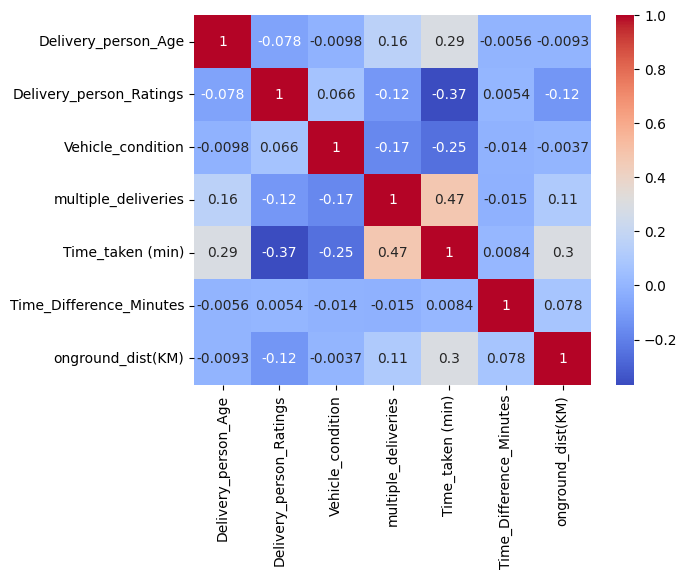

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plot correlation matrix as heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Show plot
plt.show()


In [40]:

X = df.drop('Time_taken (min)', axis=1)
y = df[["Time_taken (min)"]]

In [41]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [42]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Daytime'],
      dtype='object')

In [43]:
cat_for_ord_columns = X[["Weather_conditions","Road_traffic_density", "Festival"]].columns
cat_for_ohe_columns = X[['Type_of_order', 'Type_of_vehicle', 'City','Daytime']].columns


In [44]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))

    ]

)

# Categorigal Pipeline
cat_pipeline1=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[wather_cat,traffic_cat,festival_cat])),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

cat_pipeline2 = Pipeline(
    steps=[('imputer',SimpleImputer(strategy='most_frequent')),
           ("ohe", OneHotEncoder(categories=[typeoforder,typeofvehicle,city,day_time],handle_unknown="ignore")),
           ('scaler',StandardScaler(with_mean=False))]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline1',cat_pipeline1,cat_for_ord_columns),
("cat_pipeline2", cat_pipeline2,cat_for_ohe_columns)
])


preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_Difference_Minutes', 'onground_dist(KM)'],
      dtype='object')),
                                ('cat_pipeline1',
                                 Pipeline(steps=[('...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(categories=[['SnackMealBuffetDrinks'],
                                                                            ['motorcyclescooterelectric_scooter'],
                                                                            ['MetropolitianUrbanSemi-Urban'],
                                                                            ['nightafternoonmorningevening']],
                                                                handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Type_of_order', 'Type_of_vehicle', 'City', 'Daytime'], dtype='object'))])

In [45]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((825, 13), (354, 13), (825, 1), (354, 1))

In [47]:
preprocessor.fit_transform(X_train)

array([[ 6.79975696, 14.24395214,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.01011308, 14.55360328,  1.24211214, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.23058228, 15.48255668,  2.48422428, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.05622953, 14.86325441,  1.24211214, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.27669873, 11.45709194,  1.24211214, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.92799325, 13.31499874,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [49]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [50]:
regression.coef_

array([[ 2.44063522, -2.38817681, -1.48269167,  2.26555155, -0.1053312 ,
         1.85506737, -1.19997667,  2.64433978,  1.43891506,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [51]:
y_pred=regression.predict(X_test)
y_pred

array([[42.95979423],
       [27.00113303],
       [30.15320842],
       [13.60471947],
       [27.14240167],
       [21.33074938],
       [23.74920587],
       [31.75359903],
       [24.73293154],
       [27.80546948],
       [25.81236991],
       [27.2064145 ],
       [27.06744754],
       [23.76948721],
       [20.63803379],
       [24.19925722],
       [24.23200656],
       [26.34877983],
       [14.86456881],
       [21.59908062],
       [23.42060023],
       [24.69517095],
       [25.23725326],
       [21.02726837],
       [22.10914582],
       [24.42788505],
       [32.11615747],
       [22.14162282],
       [20.5336666 ],
       [15.61465381],
       [18.82478025],
       [24.09046152],
       [16.97163331],
       [23.84040225],
       [26.40220737],
       [21.00029018],
       [28.76107242],
       [37.37265209],
       [28.43122989],
       [19.17704124],
       [22.78217719],
       [26.25220329],
       [17.27307377],
       [19.88845654],
       [29.37154998],
       [26

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    model_list.append((list(models.keys())[i],r2_square*100))

    print('='*35)
    print('\n')

print("#*#*#"*10)
print("Train Model with better R2 score")
for i in model_list:
    if max(r2_list)*100 == i[1]:
        trained_model_list.append(i)
        print(i)

LinearRegression
Model Training Performance
RMSE: 6.5893087514211715
MAE: 5.262039181847191
R2 score 55.527625003928826


Lasso
Model Training Performance
RMSE: 7.063527656215359
MAE: 5.6467426325493175
R2 score 48.89611609126591


Ridge
Model Training Performance
RMSE: 6.589453666693267
MAE: 5.262116920804004
R2 score 55.525668866362906


Elasticnet
Model Training Performance
RMSE: 7.153720957523423
MAE: 5.751589052544716
R2 score 47.5827056954651


#*#*##*#*##*#*##*#*##*#*##*#*##*#*##*#*##*#*##*#*#
Train Model with better R2 score
('LinearRegression', 55.527625003928826)


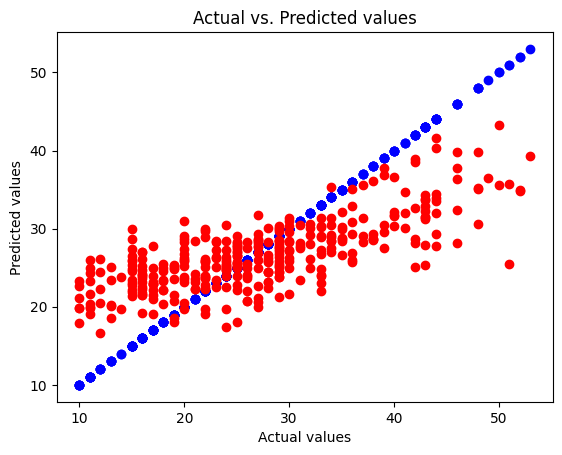

In [53]:
import matplotlib.pyplot as plt

# plot the actual values
plt.scatter(y_test, y_test, color='blue')

# plot the predicted values
plt.scatter(y_test, y_pred, color='red')

# add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# show the plot
plt.show()